## Part 1

In [1]:
# Import Packages
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data 
logins = pd.read_json('logins.json')
logins.set_index('login_time', inplace = True)
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


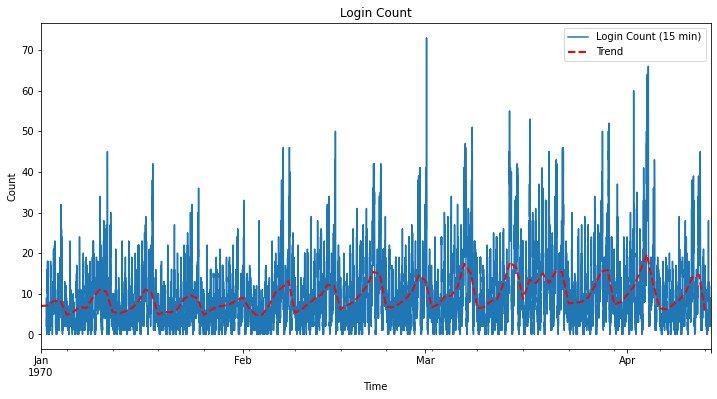

In [3]:
# Aggregate login (15 min) and plot
login_count = logins.resample('15T').size()
login_trend = login_count.resample('D').mean()

plt.figure(figsize = (12,6))
login_count.plot(label = 'Login Count (15 min)')
login_trend.plot(color = 'red', linestyle = '--', linewidth = 2, label = 'Trend')

plt.title('Login Count')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

In [4]:
# Create dataframe for daily login count
daily_count = pd.DataFrame(login_count.resample('D').sum(), columns = ['daily_count'])
daily_count['weekday'] = daily_count.index.day_name()

daily_count.head()

,daily_count,weekday
login_time,,
1970-01-01,112,Thursday
1970-01-02,681,Friday
1970-01-03,793,Saturday
1970-01-04,788,Sunday
1970-01-05,459,Monday


In [5]:
# Calculate average login count by weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_count.groupby('weekday').mean().reindex(weekdays)

,daily_count
weekday,
Monday,588.200000
Tuesday,662.000000
Wednesday,738.500000
Thursday,797.333333
Friday,1013.866667
Saturday,1291.800000
Sunday,1211.133333


From just the 15 minute aggregation of login count, it's hard to really understand the demand patterns of the users. However, taking a daily average of these counts show a clear trend in usage. There is an obvious cyclical element to the trend; the daily login count starts off low on Mondays and increases until it reaches its peak, on average, on Saturday. It seems, starting on Fridays, the weekends see increased demand compared to the rest of the week.

In [6]:
logins_df = pd.DataFrame(login_count, columns = ['count'])
logins_df['weekday'] = logins_df.index.day_name()

In [7]:
avg_breakdown = logins_df.groupby([logins_df['weekday'], logins_df.index.time]).mean()
avg_breakdown.reset_index(inplace = True)
avg_breakdown.columns = ['weekday', 'time', 'avg_count']
avg_breakdown

,weekday,time,avg_count
0,Friday,00:00:00,15.800000
1,Friday,00:15:00,17.533333
2,Friday,00:30:00,15.466667
3,Friday,00:45:00,16.200000
4,Friday,01:00:00,17.266667
...,...,...,...
667,Wednesday,22:45:00,13.785714
668,Wednesday,23:00:00,14.714286
669,Wednesday,23:15:00,15.785714
670,Wednesday,23:30:00,17.785714


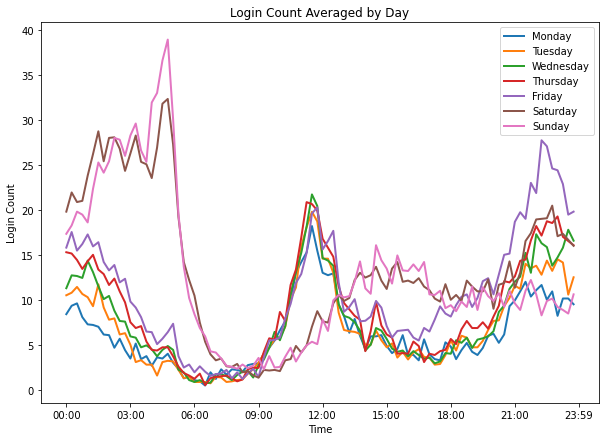

In [8]:
plt.figure(figsize = (10,7))
for day in weekdays:
    tmp = avg_breakdown[avg_breakdown['weekday'] == day]
    tmp.set_index('time', inplace = True)
    tmp['avg_count'].plot(label = day, linewidth = 2)

plt.title('Login Count Averaged by Day')
plt.xticks(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','23:59'])
plt.xlabel('Time')
plt.ylabel('Login Count')    
plt.legend()

plt.show()

## Part 2

1. To measure the success of this experiment, the first key metric to analyze would be the number of drivers/cars going across the bridge. If the experiment works, we should be able to see an increase in the overall number of cars crossing the bridge. Another would be to measure how much time each driver spends on one city. If most of the driver's time is spent on one city, the experiment has failed as we are trying to encourage drivers to not be so exclusive to one city. 
2. Over a period of a week, select $x$ amount of people to be studied. Half of the people will drive as is, and half of the drivers will have all the toll bridge fees reimbursed. Throughout the week, collect data and records pertaining to the experiment and the key metrics stated above. With this information, we'd be able to perform a simple t-test to test whether or not the reimbursement group's behavior was statistically significant. If there is an increase in the overall number of cars/drivers crossing the bridge to the other city and drivers are spending less time in one city, then the experiment could be considered a success. A caveat of this experiment would be that sampling the right group of drivers would be very important and tricky.

## Part 3

In [9]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [10]:
df.shape

(50000, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


First off, I need to take care of null values that are present in `avg_rating_of_driver`, `phone`, and `avg_rating_by_driver`. 

In [12]:
### Investigating missing avg_rating_of_driver
df[df['avg_rating_of_driver'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


From a first glance, looks like the entries with null `avg_rating_of_driver` values are cases where the user only took 0-1 trips in the first 30 days.

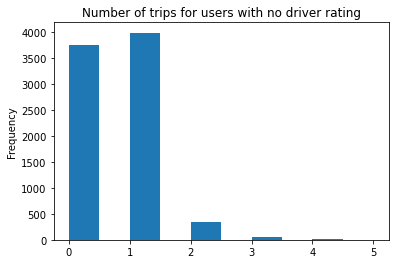

In [13]:
df[df['avg_rating_of_driver'].isnull()]['trips_in_first_30_days'].plot(kind = 'hist')
plt.title('Number of trips for users with no driver rating')
plt.show()

From the plot above, it is most likely the case that the instances with null values for `avg_rating_of_driver` are cases where the user simply did not bother to give a rating. Just blindly replacing these null values with 0 would not be representative of these users' rides. Therefore, I will replace the null values using the median/mean of `avg_rating_of_driver` depending on the skew of the distribution.

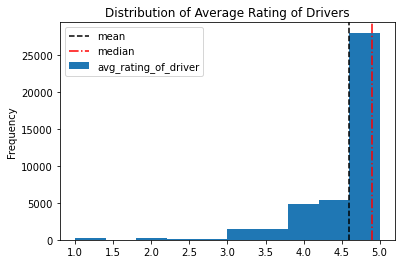

In [14]:
df['avg_rating_of_driver'].plot(kind = 'hist')
plt.axvline(df['avg_rating_of_driver'].mean(), color = 'black', linestyle = '--', label = 'mean')
plt.axvline(df['avg_rating_of_driver'].median(), color = 'red', linestyle = '-.', label = 'median')
plt.title('Distribution of Average Rating of Drivers')
plt.legend()
plt.show()

The `avg_rating_of_driver` is left skewed, with most ratings being 5.0. Because of this, the null values in `avg_rating_of_driver` will be replaced with the median value.

In [15]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace = True)
df[df['avg_rating_of_driver'].isnull()] # check no more null values exist in this column

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [16]:
### Investigate null values in `phone`

df[df['phone'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,4.9,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [17]:
df['phone'].value_counts(normalize = True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

These values COULD be replaced, perhaps with a random process but keeping the ratio of iPhone to Android the same as above. 

In [18]:
phone_prob = df['phone'].value_counts(normalize = True).values

df = df.replace(to_replace = 'None', value = np.nan)
df['phone'].fillna(pd.Series(np.random.choice(['iPhone', 'Android'], p = phone_prob, size = len(df))), inplace= True)
df['phone'].value_counts()

iPhone     34864
Android    15136
Name: phone, dtype: int64

In [19]:
### Investigating missing `avg_rating_by_driver`
df[df['avg_rating_by_driver'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iPhone,0.0,False,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,4.9,1.0,2014-01-26,iPhone,0.0,False,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,Android,0.0,False,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iPhone,0.0,False,0.0,0.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49249,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iPhone,0.0,True,100.0,4.60,NaN
49376,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iPhone,0.0,False,100.0,3.01,NaN
49504,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,Android,0.0,False,100.0,0.75,NaN
49599,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iPhone,0.0,False,100.0,2.48,NaN


These will also be replaced with the mean/median depending on the skewedness just like `avg_rating_of_driver`.

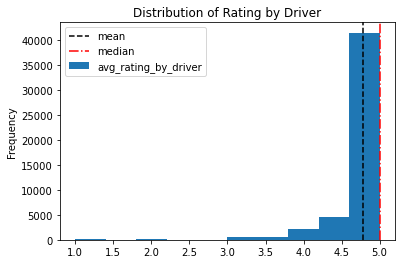

In [20]:
df['avg_rating_by_driver'].plot(kind = 'hist')
plt.axvline(df['avg_rating_by_driver'].mean(), label = 'mean', color = 'black', linestyle = '--')
plt.axvline(df['avg_rating_by_driver'].median(), label = 'median', color = 'red', linestyle = '-.')
plt.title('Distribution of Rating by Driver')
plt.legend()
plt.show()

Left skew, so median will be used to replace null values again.

In [21]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace = True)
df[df['avg_rating_by_driver'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [22]:
df.info() # No more null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### EDA

In [23]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

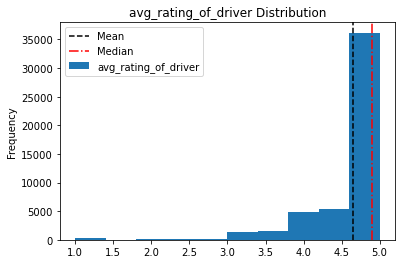

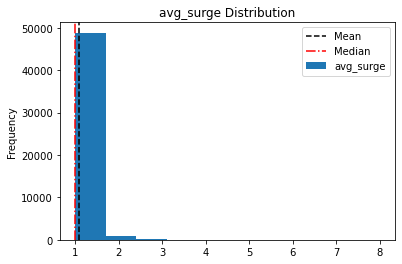

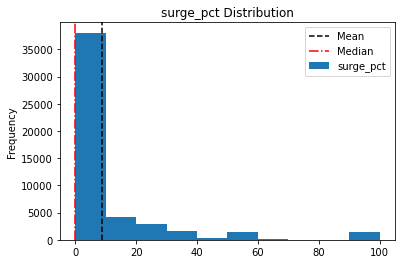

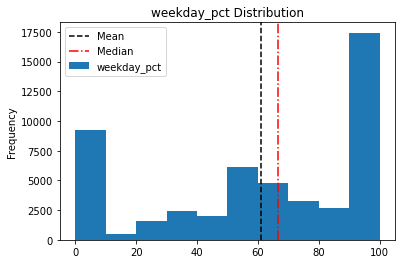

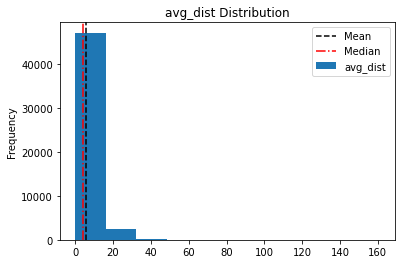

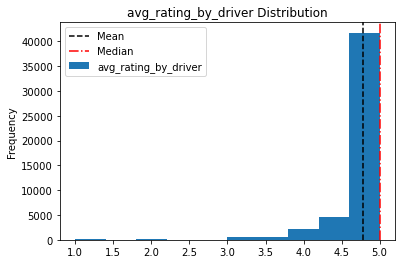

In [24]:
for column in df.columns:
    
    if df[column].dtype == float or df[column].dtype == int:
        df[column].plot(kind = 'hist')
        plt.axvline(df[column].mean(), color = 'black', linestyle = '--', label = 'Mean')
        plt.axvline(df[column].median(), color = 'red', linestyle = '-.', label = 'Median')
        plt.legend()
        plt.title(f'{column} Distribution')
        plt.show()

Most of the numerical data are skewed one side, but interestingly, the distribution of `weekly_pct` is bimodal. This indicates that most people's rides occur mostly on either the weekend or weekday (less common that one individual would take trips equally often in both weekends and weekdays). 

### Feature Engineering

In [25]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [26]:
### Calculating difference between last trip and signup date
df['days_since_signup'] = (df['last_trip_date'] - df['signup_date']).dt.days 
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47


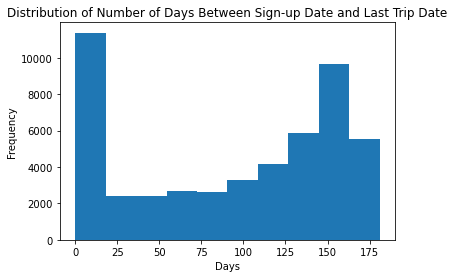

In [27]:
df['days_since_signup'].plot(kind = 'hist')
plt.title('Distribution of Number of Days Between Sign-up Date and Last Trip Date')
plt.xlabel('Days')
plt.show()

In [28]:
df['retained'] = np.where(df['days_since_signup'] > 30, 1, 0) 
# 1 if user took a trip later than 30 days since signup date, 0 if not

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_signup,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,1


In [29]:
df['retained'].value_counts()

1    36973
0    13027
Name: retained, dtype: int64

In [30]:
df['retained'].value_counts(normalize = True)

1    0.73946
0    0.26054
Name: retained, dtype: float64

Around 74% of users are retained after the initial 30 days. From the distribution of `days_since_signup`, we can see that the most common number of days between a users' sign-up date and their last trip is in the 0-20 day range. This could be due to many reasons; people visiting the area only need to use for a few days, people that don't have access to their regular mode of transportation, people that did not find their experience using the service enjoyable, etc. 

### Preprocessing

In [31]:
# datetime columns need to be dropped as they cannot be used as inputs in a classifier
df.drop(['signup_date', 'last_trip_date'], axis = 1, inplace = True)
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_signup,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,143,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,96,1
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,47,1


In [32]:
# Remove 'days_since_signup' column (obvious indicator for retain or not)
days_since_signup = df.pop('days_since_signup')
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,1
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,1


In [33]:
# Dummy encoding categorical features (city, phone)
city_phone_dummies = pd.get_dummies(df[['city', 'phone']])
df.drop(['city', 'phone'], axis = 1, inplace = True)
df = df.merge(city_phone_dummies, left_index = True, right_index = True)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,1,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,1,0,0,1,1,0


In [34]:
# Convert ultimate_black_user to 1s and 0s
df['ultimate_black_user'] = df['ultimate_black_user']*1
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,1,0,0,1,1,0


In [35]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

y = df.pop('retained')
X = df
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,1,0


In [36]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: retained, dtype: int32

In [37]:
### Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X , columns = df.columns)
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0.453984,0.086801,0.113506,0.328202,1.285285,-0.397131,-0.372650,0.495437,-0.702890,1.983894,-0.935515,-0.658896,0.658896
1,-0.600689,0.608000,-0.336268,-0.443394,-0.778038,-0.294653,0.431583,0.495437,1.422699,-0.504059,-0.935515,1.517690,-1.517690
2,0.190316,-0.608132,-0.336268,-0.443394,-0.778038,1.053741,-0.880771,0.495437,1.422699,-0.504059,-0.935515,-0.658896,0.658896
3,1.772325,-0.086933,0.293416,0.558679,1.285285,0.514383,-0.602181,0.271207,-0.702890,1.983894,-0.935515,-0.658896,0.658896
4,3.090665,-0.434399,0.518303,0.147829,-0.778038,0.579106,-0.467266,0.271207,-0.702890,-0.504059,1.068930,1.517690,-1.517690


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [39]:
### Define function for scoring models ###
from sklearn import metrics

def score_model(model, prediction, model_name = None):
    acc = metrics.accuracy_score(y_test, prediction)
    bal_acc = metrics.balanced_accuracy_score(y_test, prediction)
    precision = metrics.precision_score(y_test, prediction, pos_label = 1)
    recall = metrics.recall_score(y_test, prediction, pos_label = 1)
    
    print(f'Accuracy: {acc:.4f}')
    print(f'Balanced Accuracy: {bal_acc:.4f}')
    print(f'Precision score for yes: {precision:.4f}')
    print(f'Recall score for yes: {recall:.4f}')
    
    class_labels = model.classes_.astype(str)
    

    print(metrics.classification_report(y_test, prediction))
    
    metrics.plot_confusion_matrix(model, X_test, y_test, display_labels = class_labels, values_format = 'd')
    
    if model_name is not None:
        plt.title(f'{model_name} Confusion Matrix')
        plt.savefig(f'figures/{model_name.replace(" ","")}_confmatrix.png', dpi = 300)
      
    plt.show()
    
    return [acc, bal_acc, precision, recall]

Baseline Decision Tree Model
Accuracy: 0.8999
Balanced Accuracy: 0.8683
Precision score for yes: 0.9303
Recall score for yes: 0.9345
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2613
           1       0.93      0.93      0.93      7387

    accuracy                           0.90     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.90      0.90      0.90     10000



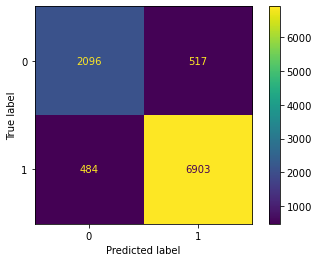

In [40]:
### First Model: Decision Tree ### 

from sklearn import tree

baseline = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)

print("Baseline Decision Tree Model")
base_tree_metrics = score_model(baseline, baseline_pred)

Base Random Forest Model
Accuracy: 0.9045
Balanced Accuracy: 0.8683
Precision score for yes: 0.9279
Recall score for yes: 0.9441
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2613
           1       0.93      0.94      0.94      7387

    accuracy                           0.90     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.90      0.90      0.90     10000



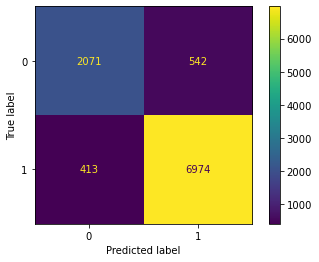

In [41]:
### Second Model: Random Forest ###
from sklearn.ensemble import RandomForestClassifier

base_forest = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
base_forest.fit(X_train, y_train.values.ravel())

base_forest_pred = base_forest.predict(X_test)

print('Base Random Forest Model')
base_forest_metrics = score_model(base_forest, base_forest_pred)

Accuracy: 0.9125
Balanced Accuracy: 0.8909
Precision score for yes: 0.9449
Recall score for yes: 0.9361
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2613
           1       0.94      0.94      0.94      7387

    accuracy                           0.91     10000
   macro avg       0.88      0.89      0.89     10000
weighted avg       0.91      0.91      0.91     10000



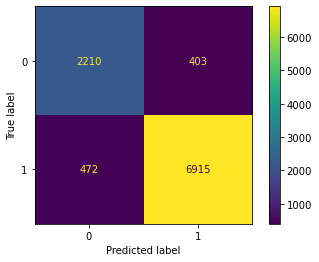

In [42]:
### Third Model: Gradient Boosting Classifier ###

from sklearn.ensemble import GradientBoostingClassifier

base_gbm = GradientBoostingClassifier(random_state = 42)
base_gbm.fit(X_train, y_train.values.ravel())

base_gbm_pred = base_gbm.predict(X_test)

base_gbm_metrics = score_model(base_gbm, base_gbm_pred)

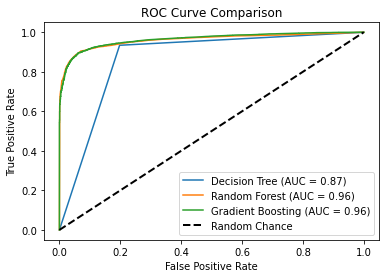

In [43]:
# Comparing Models
plt.figure(figsize = (6,4))
ax = plt.gca()
tree_roc = metrics.plot_roc_curve(baseline, X_test, y_test, ax = ax, name = 'Decision Tree')
forest_roc = metrics.plot_roc_curve(base_forest, X_test, y_test, ax = ax, name = 'Random Forest')
gbm_roc = metrics.plot_roc_curve(base_gbm, X_test, y_test, ax = ax, name = 'Gradient Boosting')
ax.plot([0,1], [0,1], linestyle = '--', label = 'Random Chance', color = 'black', linewidth = 2)
ax.set_title('ROC Curve Comparison')
ax.legend()
plt.show()

From the results seen above, we can see that with just the three baseline models of Decision Tree, Random Forest, and Gradient Boosting classifiers, we are able to obtain a pretty good prediction accuracy. Of the three models tested, it's obvious that the Random Forest and Gradient Boosting outperform the Decision Tree model, as is expected. A simple way of interpreting the ROC curve is by looking at how close the curve gets to the top left corner of the plot. Gradient Boosting and Random Forest are practically on top of each other with the same Area Under the Curve (AUC) score of 0.96. To decide which model to select, we can take a look at each model's precision and recall to get a better understanding of how each model performs. The precision is the ratio between True Positives and all positives predicted $(\frac{TP}{TP+FP})$, while the recall is the ratio of True Positives to all ACTUAL positives $(\frac{TP}{TP+FN})$. For this specific project we want to **maximize the prediction of all actual positive cases**; therefore, it would make sense to prioritize the model with a higher recall score. From the table below, it can be seen that the model that maximizes recall is the **Random Forest Classifier**. Ultimate should utilize the Random Forest Classifier to most accurately predict customer retention.

This is a very rudimentary analysis of the possible models that Ultimate can use to predict customer retention. Ultimate can further this analysis by performing more in-depth feature engineering, hyperparameter tuning models, and increasing the number of models tested. 

In [44]:
model_metrics = pd.DataFrame({'Decision Tree': base_tree_metrics,
                              'Random Forest': base_forest_metrics,
                              'Gradient Boosting': base_gbm_metrics},
                            index = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall'])
model_metrics

,Decision Tree,Random Forest,Gradient Boosting
Accuracy,0.899900,0.904500,0.912500
Balanced Accuracy,0.868311,0.868333,0.890938
Precision,0.930323,0.927887,0.944930
Recall,0.934479,0.944091,0.936104


With this analyses, Ultimate can leverage the insights to increase customer retention. Now that Ultimate can analyze which customers are more likely to not ride with them after 30 days, Ultimate can investigate if there are any commonalities among these customers that are preventing them from returning and altering their business model to retain these customers. 